<a href="https://colab.research.google.com/github/nikhilagrawal2000/Variational_Auto_Encoder/blob/master/VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
tf.reset_default_graph()

batch_size = 49

X_in = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='X')
Y    = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='Y')
Y_flat = tf.reshape(Y, shape=[-1, 28 * 28])
keep_prob = tf.placeholder(dtype=tf.float32, shape=(), name='keep_prob')

dec_in_channels = 1
n_latent = 8

reshaped_dim = [-1, 7, 7, dec_in_channels]
inputs_decoder = 48 * dec_in_channels / 2


def lrelu(x, alpha=0.3):
    return tf.maximum(x, tf.multiply(x, alpha))

In [0]:
def encoder(X_in, keep_prob):
    activation = lrelu
    with tf.variable_scope("encoder", reuse=None):
        X = tf.reshape(X_in, shape=[-1, 28, 28, 1])
        x = tf.layers.conv2d(X, filters=64, kernel_size=4, strides=2, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d(x, filters=64, kernel_size=4, strides=2, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d(x, filters=64, kernel_size=4, strides=1, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.contrib.layers.flatten(x)
        mn = tf.layers.dense(x, units=n_latent)
        sd       = 0.5 * tf.layers.dense(x, units=n_latent)            
        epsilon = tf.random_normal(tf.stack([tf.shape(x)[0], n_latent])) 
        z  = mn + tf.multiply(epsilon, tf.exp(sd))
        
        return z, mn, sd

In [0]:

def decoder(sampled_z, keep_prob):
    with tf.variable_scope("decoder", reuse=None):
        x = tf.layers.dense(sampled_z, units=inputs_decoder, activation=lrelu)
        x = tf.layers.dense(x, units=inputs_decoder * 2 + 1, activation=lrelu)
        x = tf.reshape(x, reshaped_dim)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=2, padding='same', activation=tf.nn.relu)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=1, padding='same', activation=tf.nn.relu)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=1, padding='same', activation=tf.nn.relu)
        
        x = tf.contrib.layers.flatten(x)
        x = tf.layers.dense(x, units=28*28, activation=tf.nn.sigmoid)
        img = tf.reshape(x, shape=[-1, 28, 28])
        return img

In [0]:
sampled, mn, sd = encoder(X_in, keep_prob)
dec = decoder(sampled, keep_prob)

In [0]:
unreshaped = tf.reshape(dec, [-1, 28*28])
img_loss = tf.reduce_sum(tf.squared_difference(unreshaped, Y_flat), 1)
latent_loss = -0.5 * tf.reduce_sum(1.0 + 2.0 * sd - tf.square(mn) - tf.exp(2.0 * sd), 1)
loss = tf.reduce_mean(img_loss + latent_loss)
optimizer = tf.train.AdamOptimizer(0.0005).minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

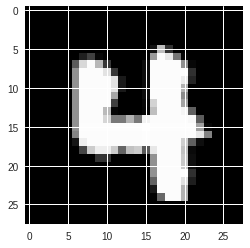

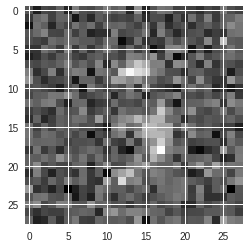

0 179.45976 179.45561 0.0041279383


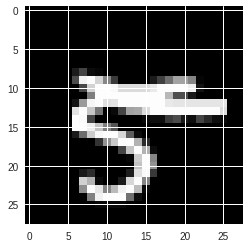

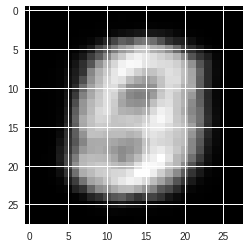

200 51.68522 50.437454 1.2477624


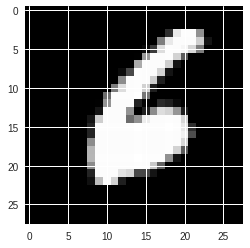

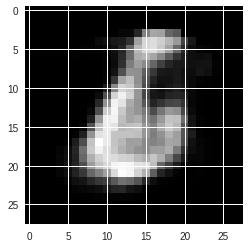

400 41.314026 36.083664 5.2303634


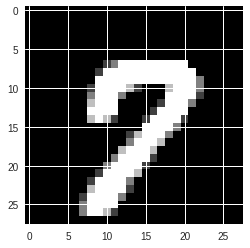

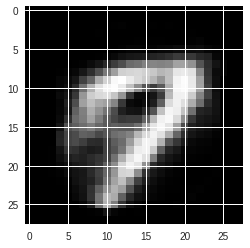

600 36.35 29.328125 7.021873


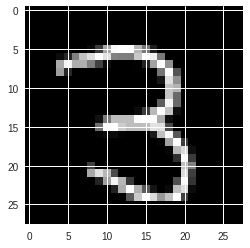

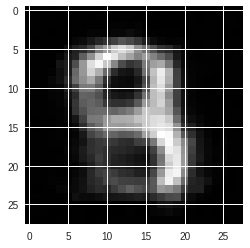

800 34.780926 27.478214 7.3027163


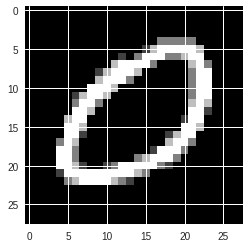

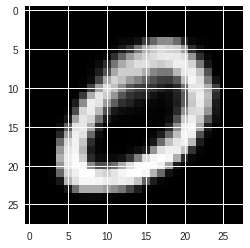

1000 36.775734 28.40411 8.371622


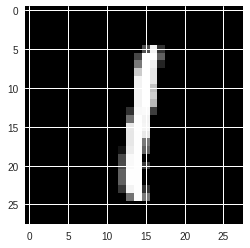

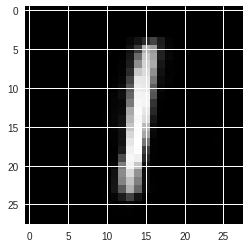

1200 32.692448 23.779612 8.912835


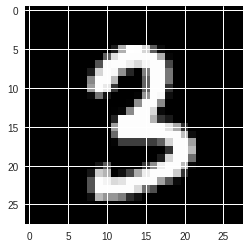

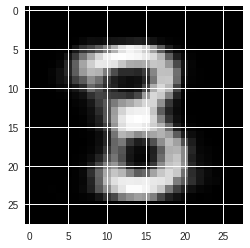

1400 30.595833 22.583103 8.0127325


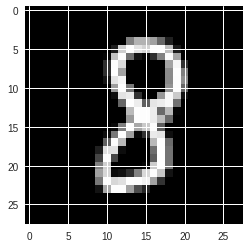

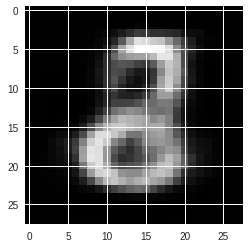

1600 33.18963 24.758602 8.431027


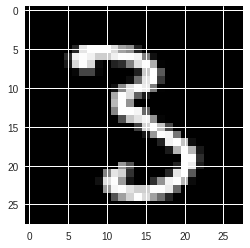

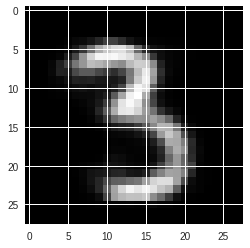

1800 31.854572 22.805355 9.049215


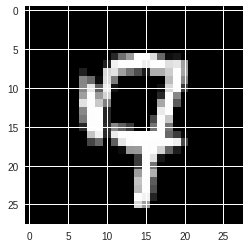

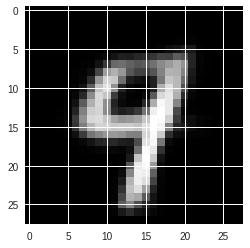

2000 31.76068 22.579449 9.181231


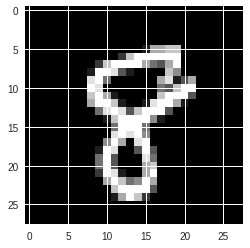

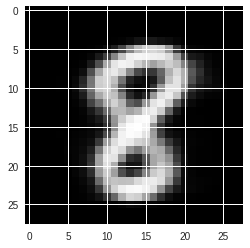

2200 29.297478 20.279613 9.017864


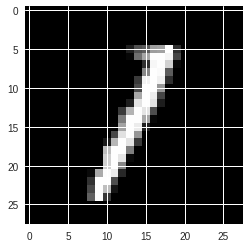

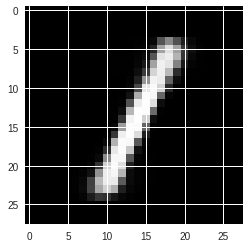

2400 33.901447 24.792278 9.109169


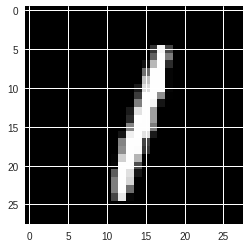

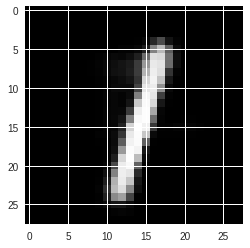

2600 31.152483 21.413754 9.738732


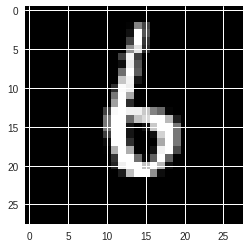

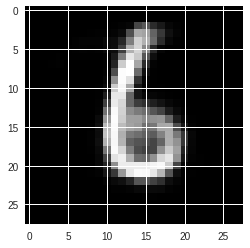

2800 31.14625 21.67645 9.469797


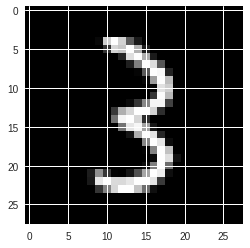

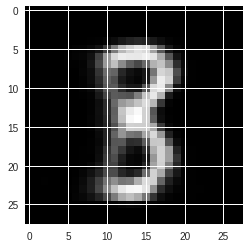

3000 31.55089 21.559423 9.991469


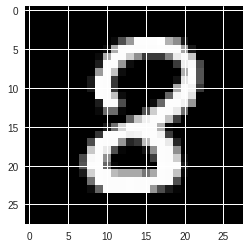

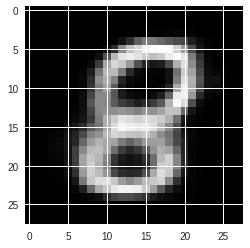

3200 30.767996 21.436924 9.331076


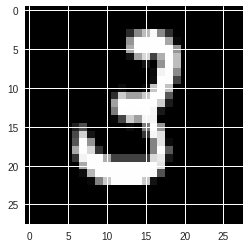

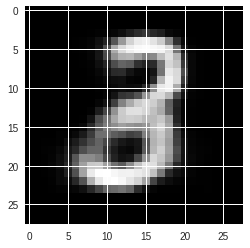

3400 30.428102 21.220324 9.207779


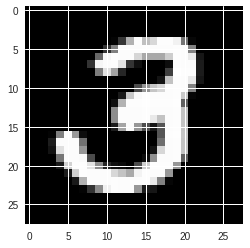

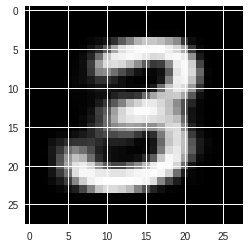

3600 28.15204 19.092758 9.059282


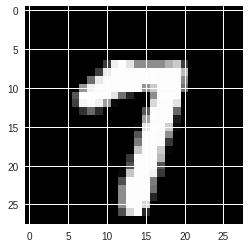

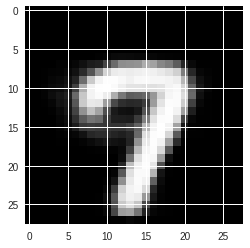

3800 29.925507 20.227018 9.698489


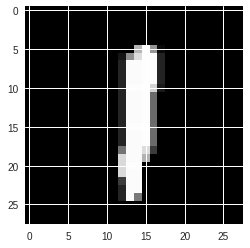

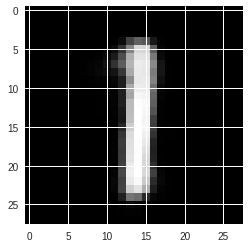

4000 31.044273 21.106161 9.938109


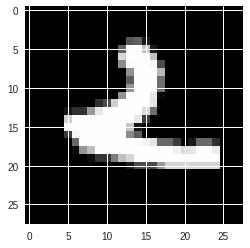

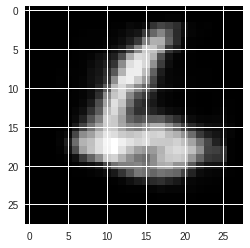

4200 28.782335 19.376032 9.406304


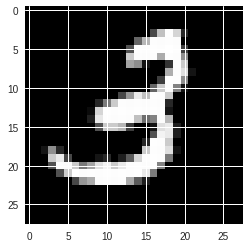

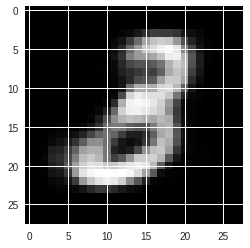

4400 30.496202 20.5294 9.966802


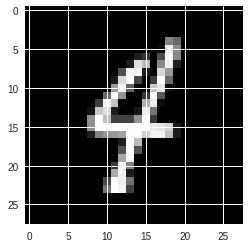

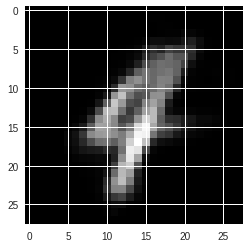

4600 29.94607 20.735172 9.2108965


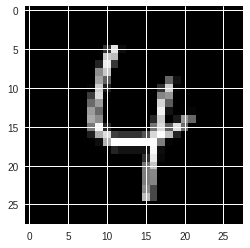

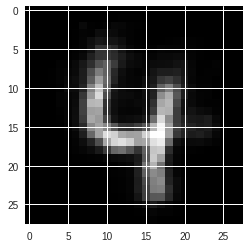

4800 28.197247 18.533237 9.664008


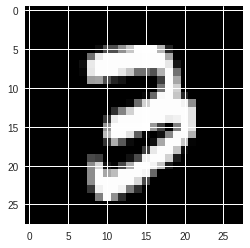

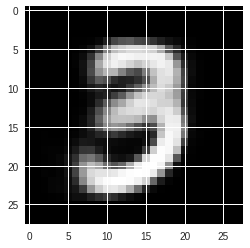

5000 28.435596 18.055029 10.380569


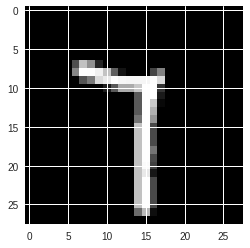

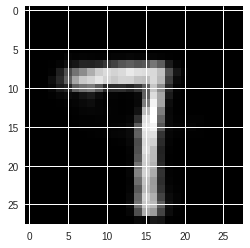

5200 28.42779 19.378147 9.049643


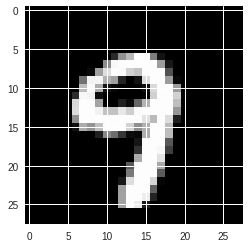

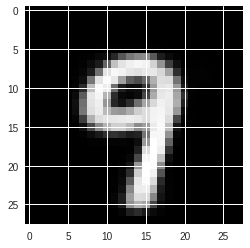

5400 28.976088 18.757381 10.218704


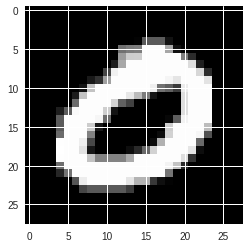

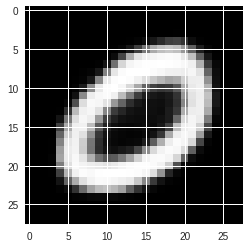

5600 27.49158 17.665436 9.826144


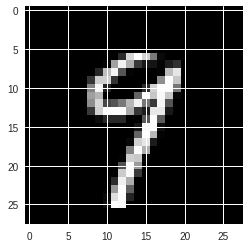

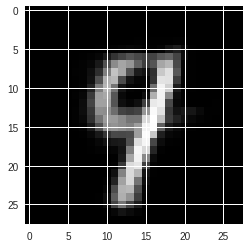

5800 29.353924 19.166733 10.187192


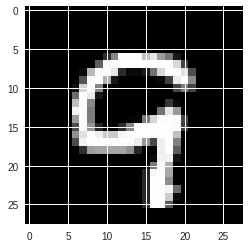

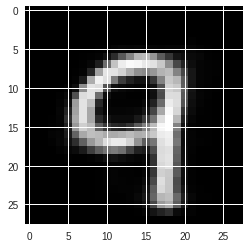

6000 28.170525 18.33137 9.839158


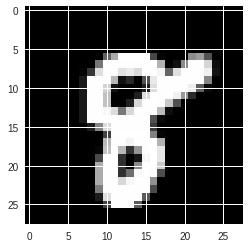

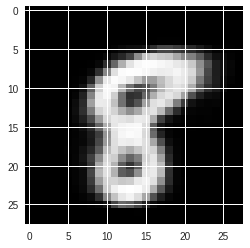

6200 27.97475 17.821644 10.153108


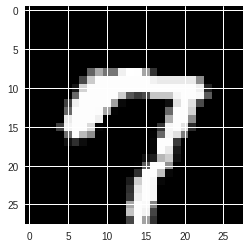

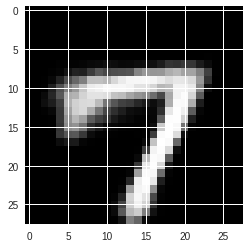

6400 30.453484 20.596958 9.856527


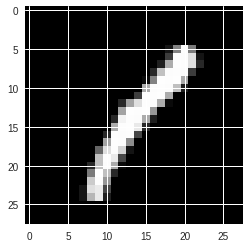

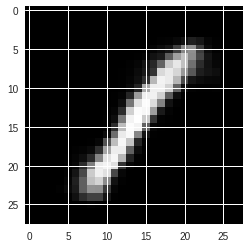

6600 26.984222 17.151083 9.833139


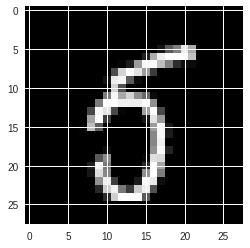

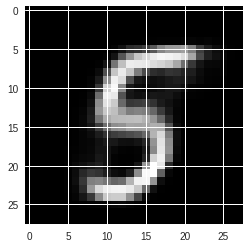

6800 28.57219 19.234932 9.3372555


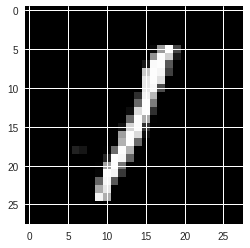

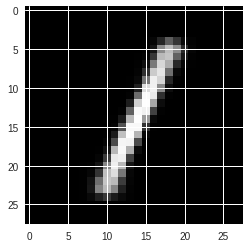

7000 27.99568 17.706112 10.289568


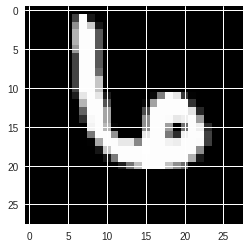

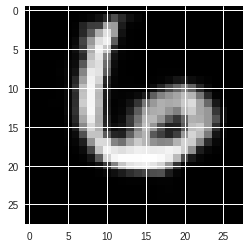

7200 29.611925 20.399855 9.212074


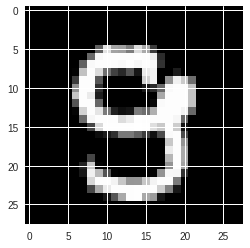

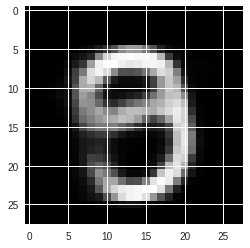

7400 29.256437 19.414646 9.841791


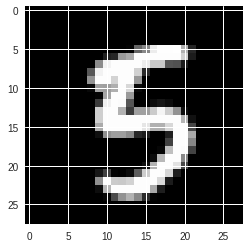

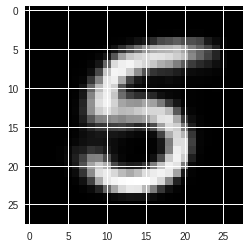

7600 27.88366 18.332024 9.551639


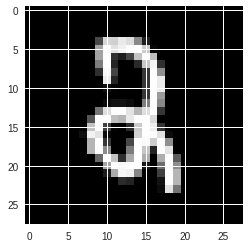

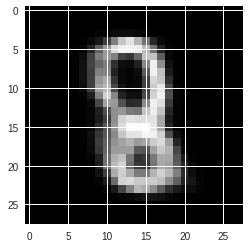

7800 29.711296 19.78463 9.926665


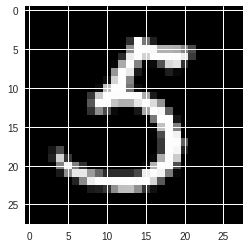

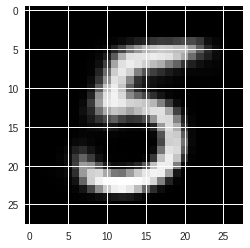

8000 28.45892 18.885157 9.573764


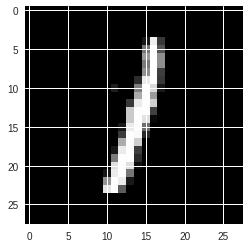

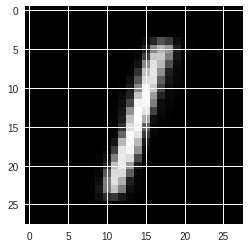

8200 26.037779 16.447565 9.590215


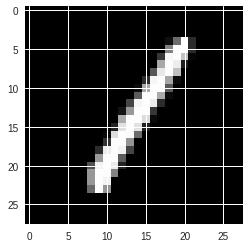

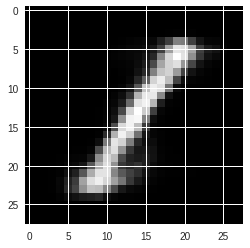

8400 27.99044 17.799152 10.191289


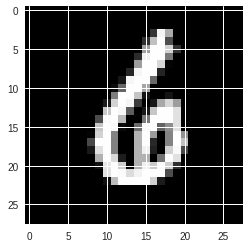

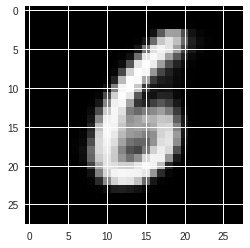

8600 28.034555 18.076778 9.957777


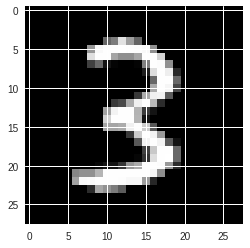

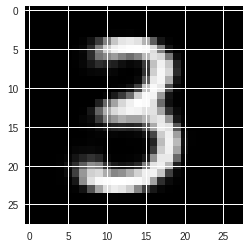

8800 27.933504 17.94168 9.991823


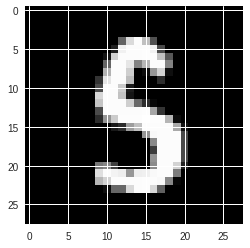

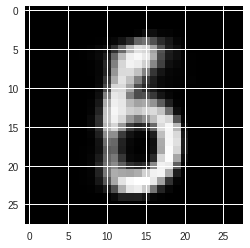

9000 28.895224 17.76592 11.129302


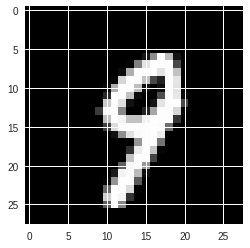

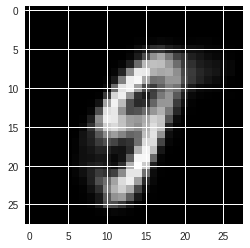

9200 27.975382 17.659178 10.316204


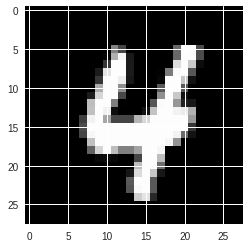

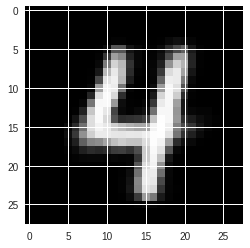

9400 28.797144 18.763006 10.034135


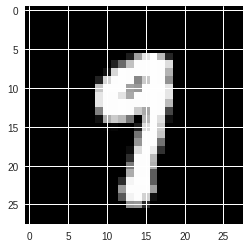

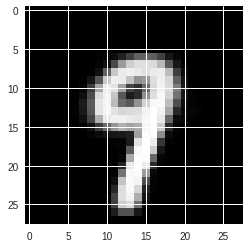

9600 27.599527 16.705305 10.894221


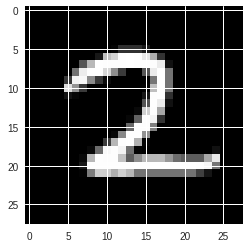

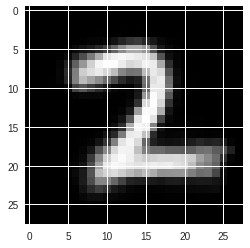

9800 29.88508 19.061785 10.823297


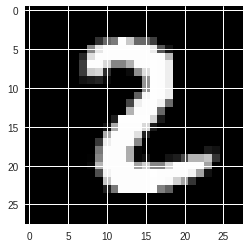

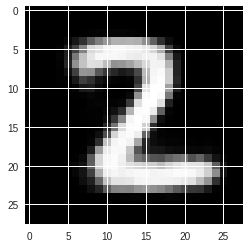

10000 29.119806 18.545265 10.574541


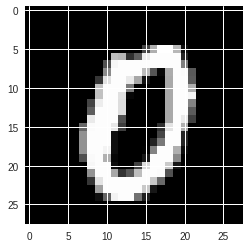

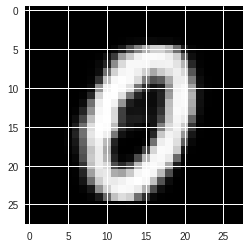

10200 27.689688 17.604404 10.085284


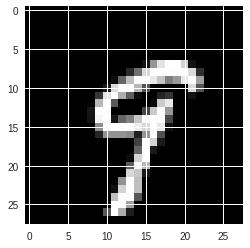

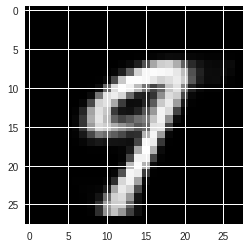

10400 26.362928 15.906928 10.456


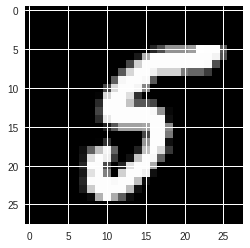

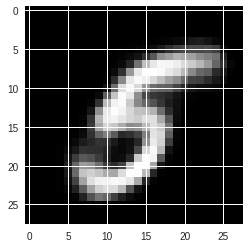

10600 28.061293 17.67923 10.382066


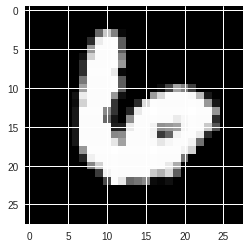

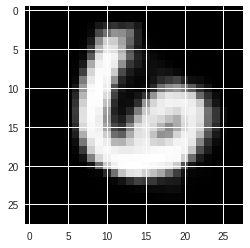

10800 28.058807 17.956629 10.102179


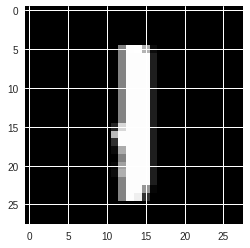

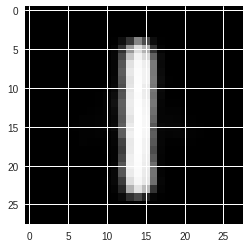

11000 29.057781 18.980446 10.077334


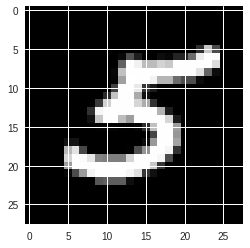

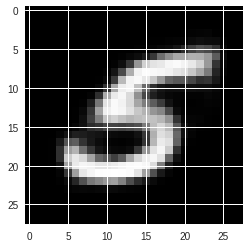

11200 28.164038 17.64347 10.520565


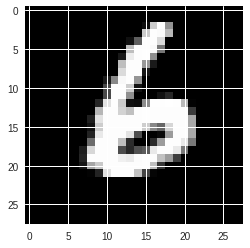

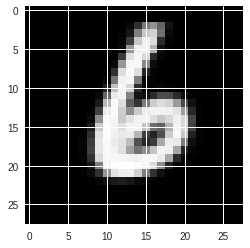

11400 29.14933 18.96381 10.185518


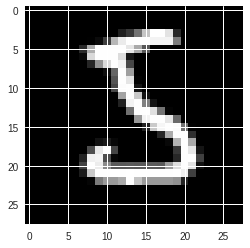

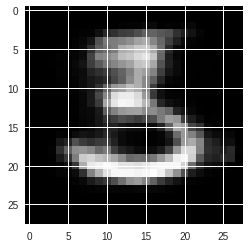

11600 28.696272 18.462856 10.233414


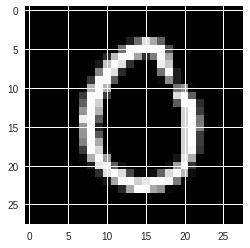

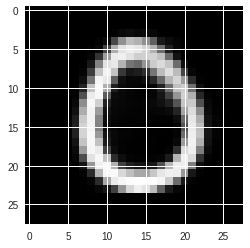

11800 28.888632 18.385672 10.502962


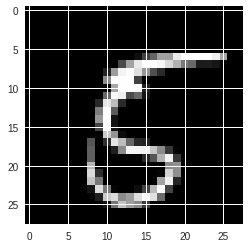

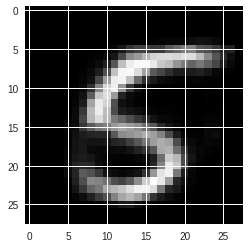

12000 26.8781 16.77302 10.105082


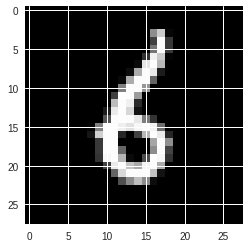

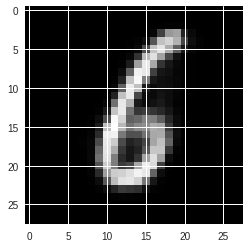

12200 30.503891 20.04353 10.460359


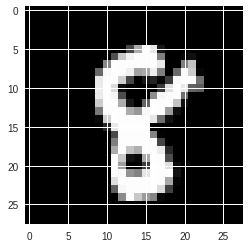

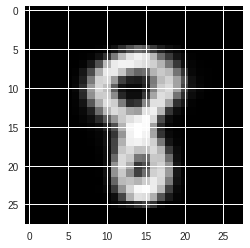

12400 27.517641 17.263504 10.254137


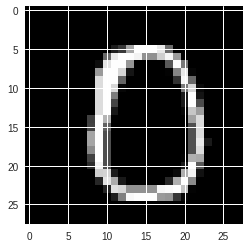

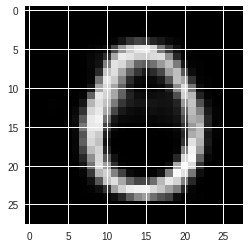

12600 28.317991 18.392591 9.9254


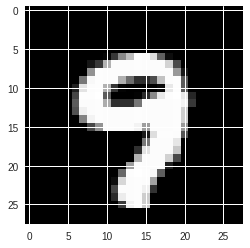

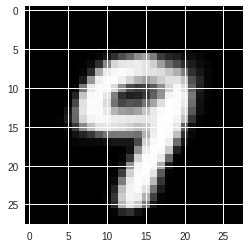

12800 28.618603 17.723665 10.894938


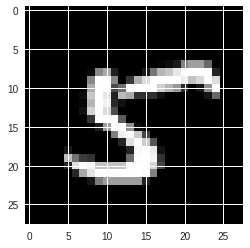

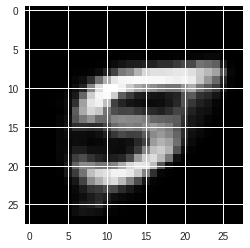

13000 29.949177 19.735975 10.213202


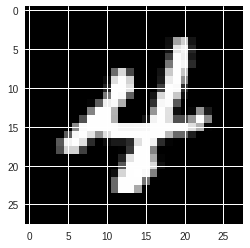

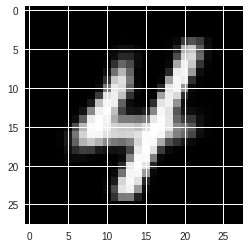

13200 26.998789 17.017792 9.980997


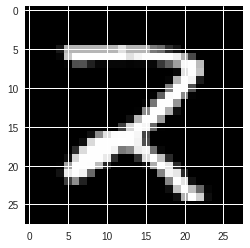

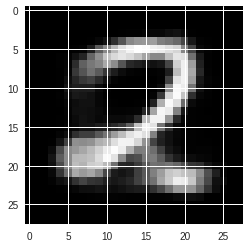

13400 26.993946 17.002716 9.991232


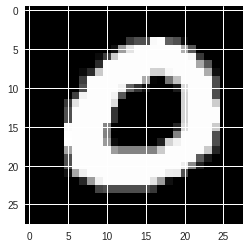

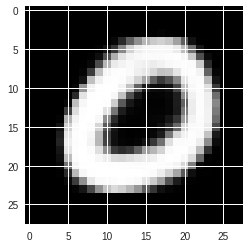

13600 25.725727 15.793011 9.932715


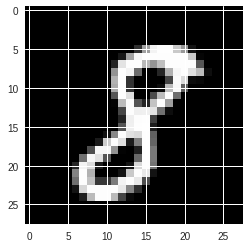

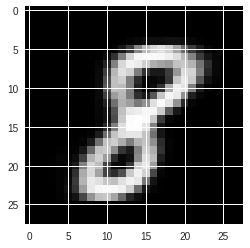

13800 28.13602 17.750454 10.385566


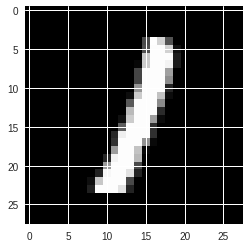

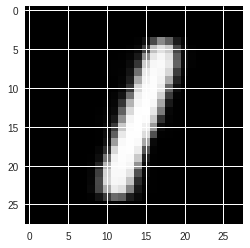

14000 30.51105 19.55592 10.95513


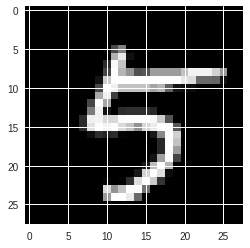

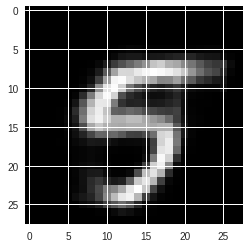

14200 25.764748 15.52908 10.235669


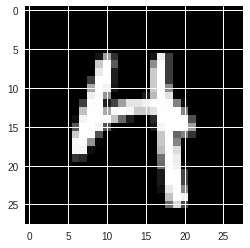

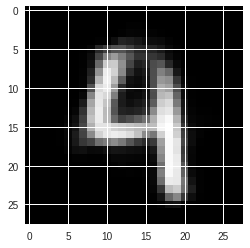

14400 28.486444 18.502466 9.983979


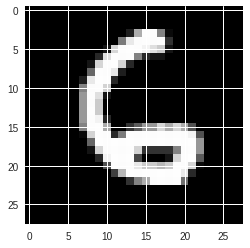

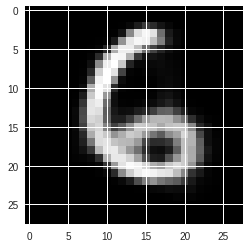

14600 27.63052 17.029211 10.601311


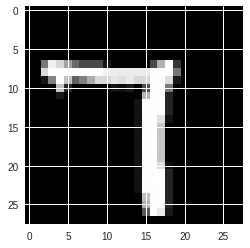

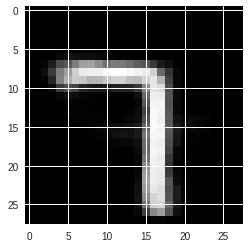

14800 29.99422 19.631977 10.362244


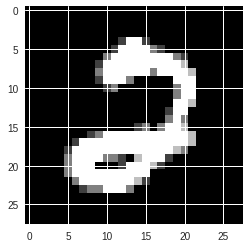

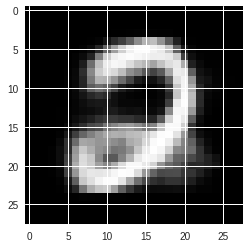

15000 27.45073 17.616116 9.834614


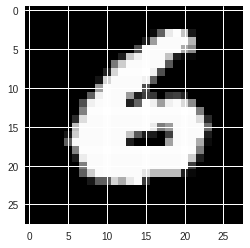

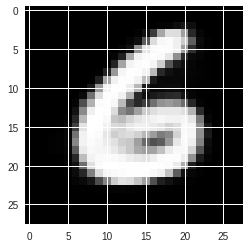

15200 28.410677 17.685675 10.725001


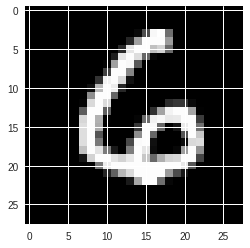

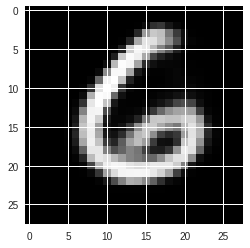

15400 26.52938 16.55935 9.970029


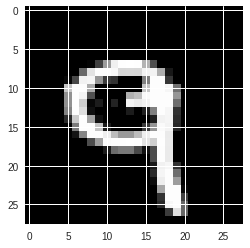

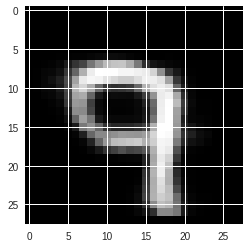

15600 27.45947 16.944176 10.515297


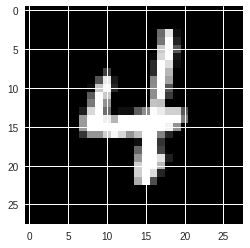

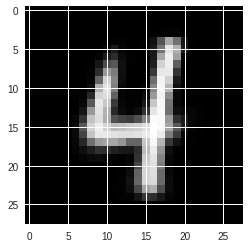

15800 27.716135 17.958426 9.7577095


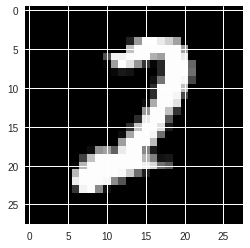

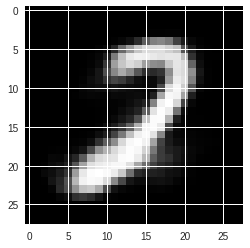

16000 28.559181 18.56456 9.994621


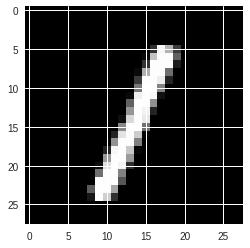

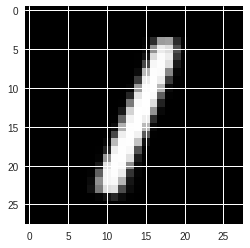

16200 27.395355 16.772392 10.622962


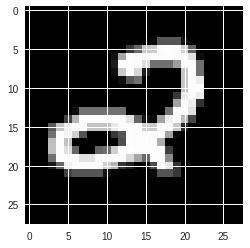

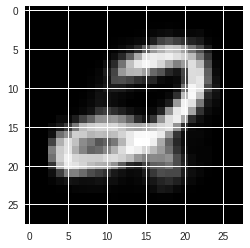

16400 27.155834 16.459013 10.696822


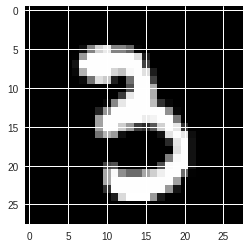

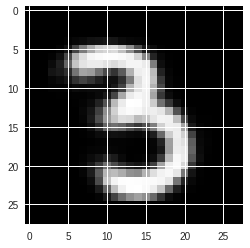

16600 28.05936 17.119919 10.939441


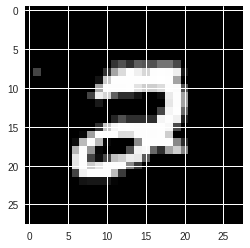

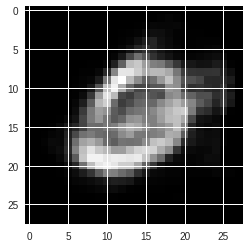

16800 28.88993 18.28469 10.60524


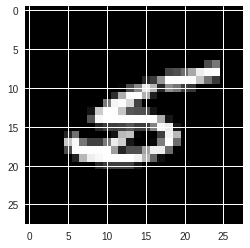

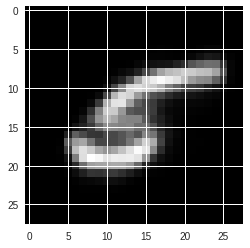

17000 24.107944 13.624336 10.483609


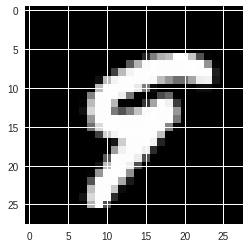

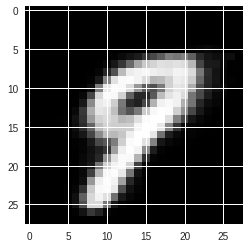

17200 28.844732 18.471779 10.372953


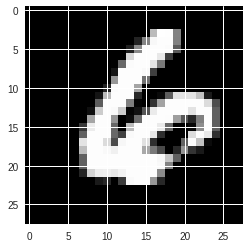

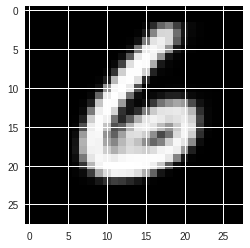

17400 26.44939 16.4654 9.98399


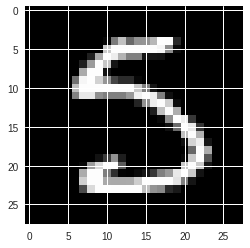

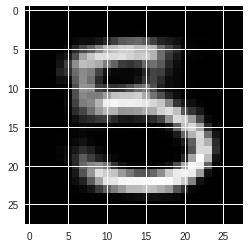

17600 28.782913 18.448664 10.33425


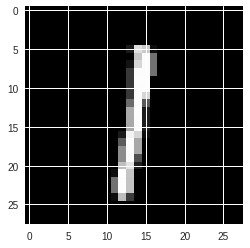

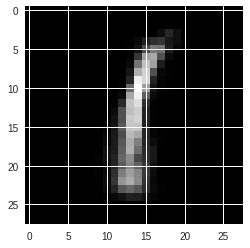

17800 25.12403 14.757524 10.366506


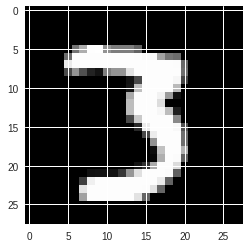

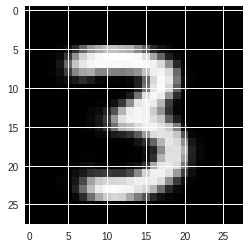

18000 28.928717 17.948399 10.980318


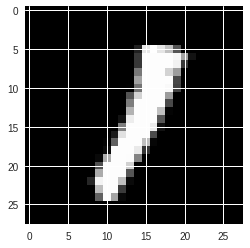

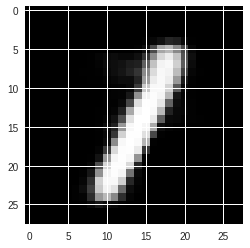

18200 26.805779 16.550777 10.255001


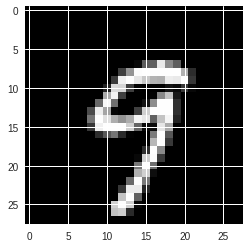

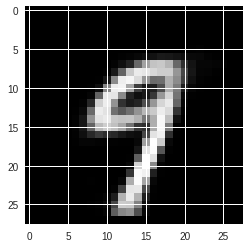

18400 28.327646 17.522446 10.805202


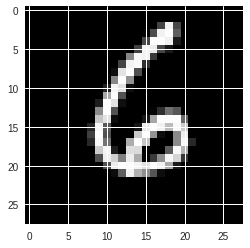

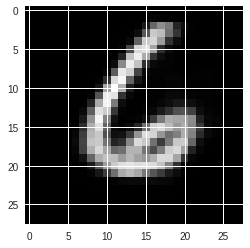

18600 27.43504 17.26631 10.168729


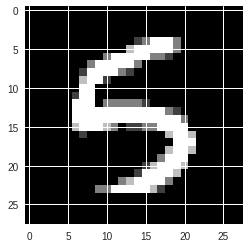

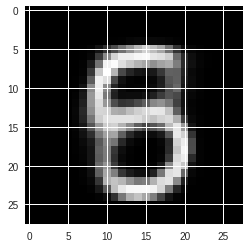

18800 29.174297 18.478817 10.695479


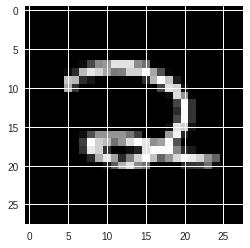

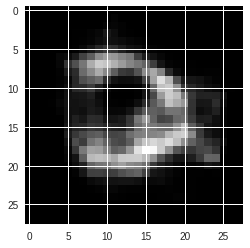

19000 27.830242 17.40008 10.430162


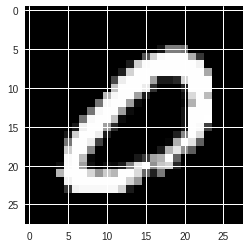

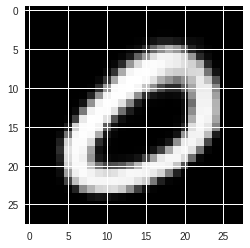

19200 27.504925 16.483099 11.021827


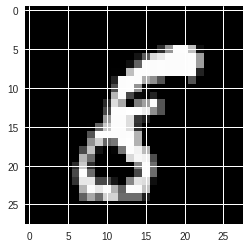

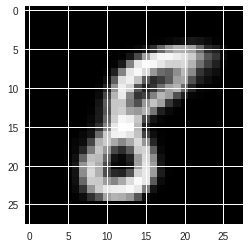

19400 27.298756 17.12995 10.168806


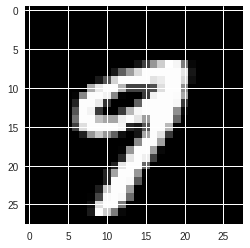

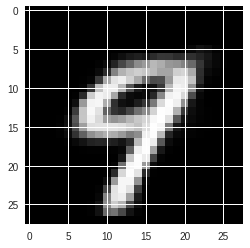

19600 27.266705 16.63806 10.628643


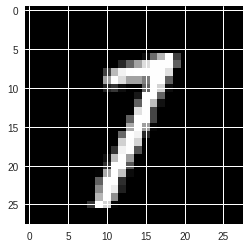

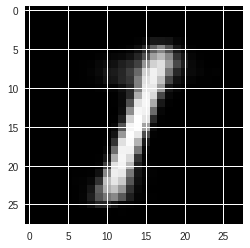

19800 27.03551 15.902901 11.132609


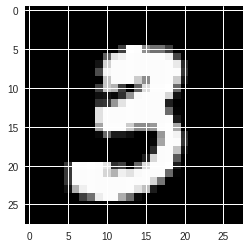

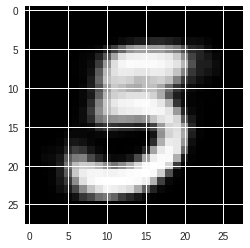

20000 26.649918 16.430395 10.219521


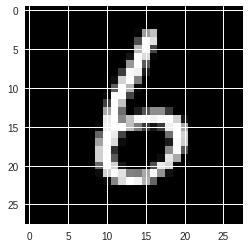

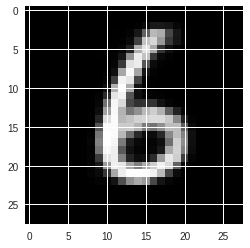

20200 28.015106 17.68892 10.326187


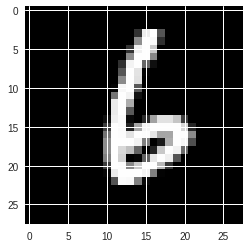

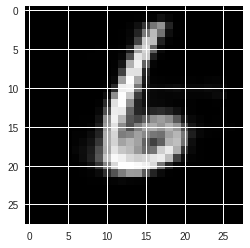

20400 29.418394 18.782272 10.636125


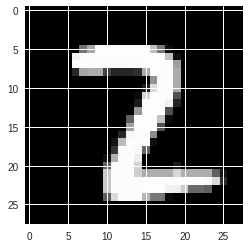

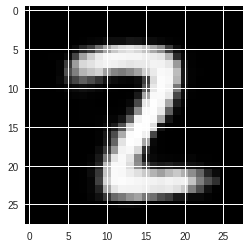

20600 24.076435 14.145658 9.930781


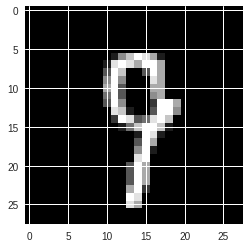

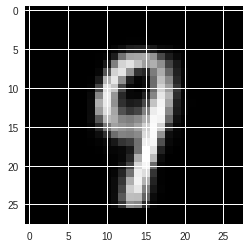

20800 29.036697 18.349287 10.687411


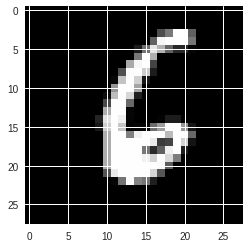

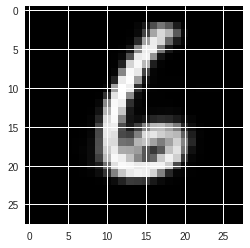

21000 26.861204 16.159147 10.702059


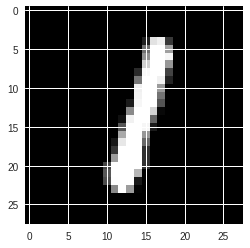

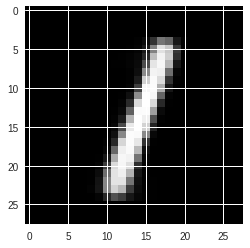

21200 26.42553 15.675239 10.750294


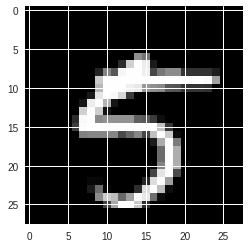

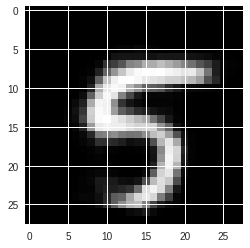

21400 25.367865 14.771404 10.596459


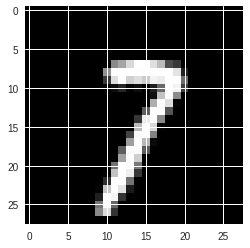

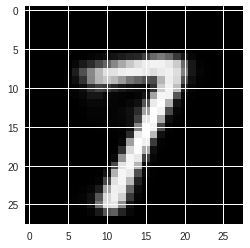

21600 29.108652 18.296618 10.812033


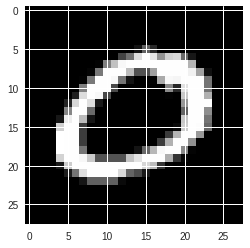

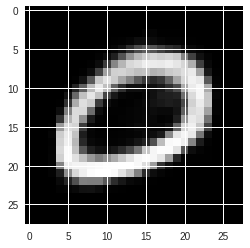

21800 27.460426 17.148829 10.311598


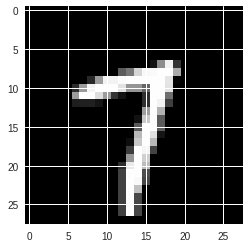

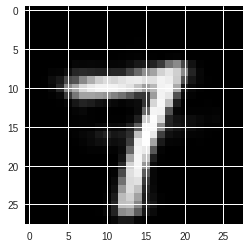

22000 26.181887 15.58272 10.599167


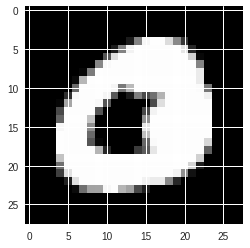

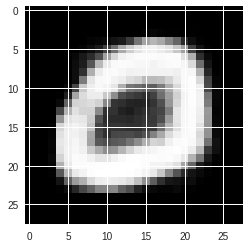

22200 26.437109 16.008669 10.428441


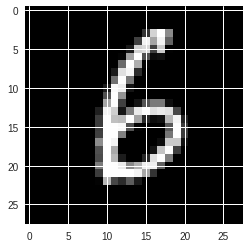

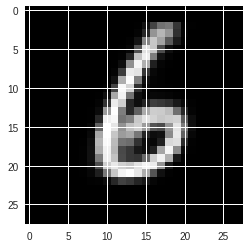

22400 27.962637 17.184855 10.777782


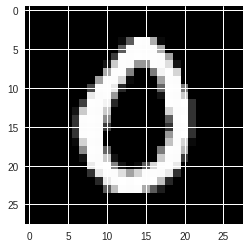

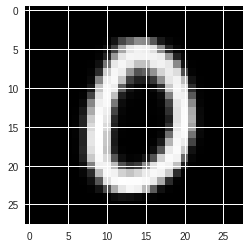

22600 26.534084 15.53147 11.002616


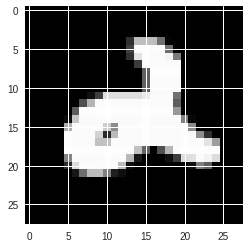

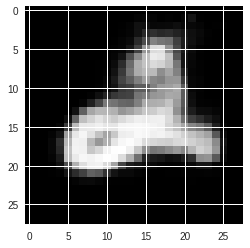

22800 26.353277 16.243156 10.110121


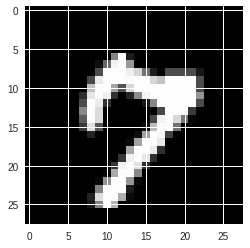

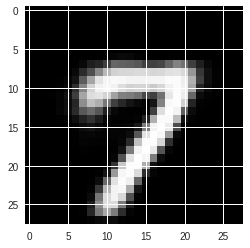

23000 28.51677 17.300682 11.216087


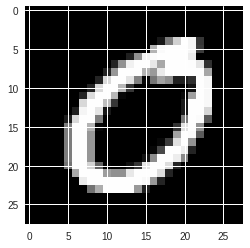

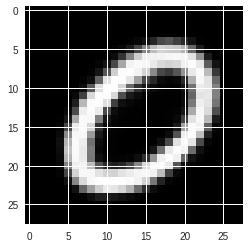

23200 27.178766 16.338852 10.839913


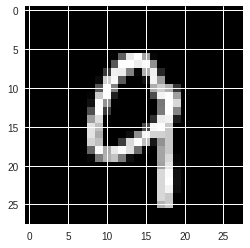

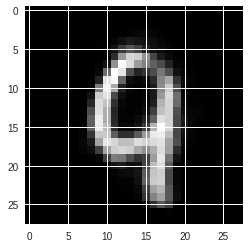

23400 25.718195 15.378002 10.340193


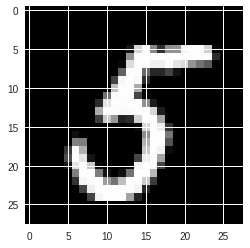

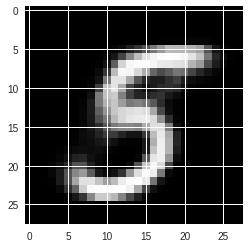

23600 26.96246 16.557955 10.404503


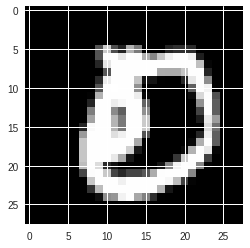

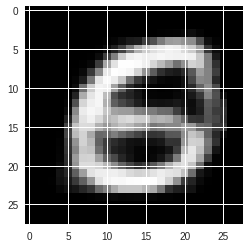

23800 28.982082 18.457249 10.524834


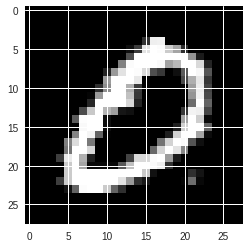

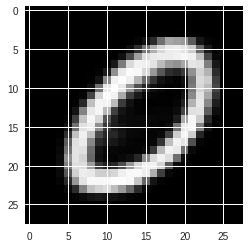

24000 27.722454 16.586683 11.135774


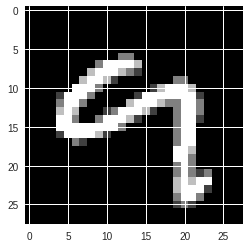

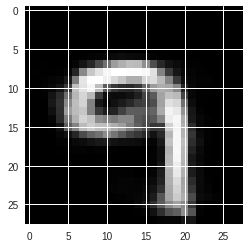

24200 27.421646 16.382927 11.038721


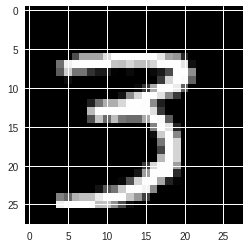

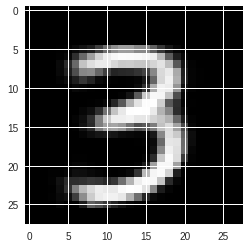

24400 26.443594 15.817078 10.626514


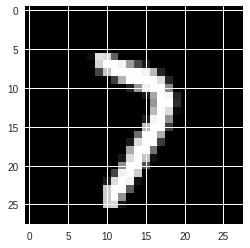

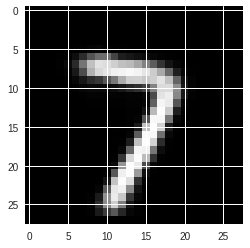

24600 26.073187 15.322421 10.750768


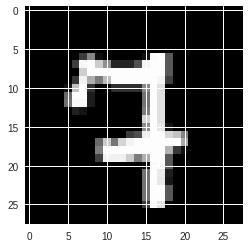

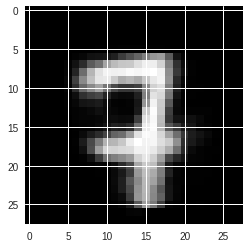

24800 27.697315 16.620697 11.076618


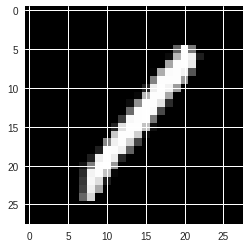

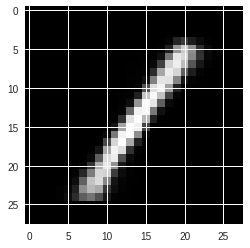

25000 26.99546 16.398397 10.597063


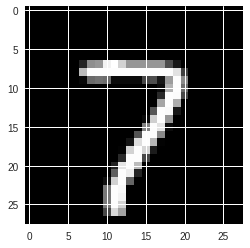

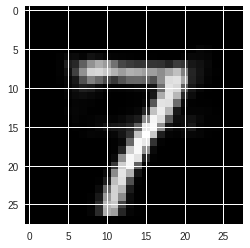

25200 25.902742 14.746847 11.155896


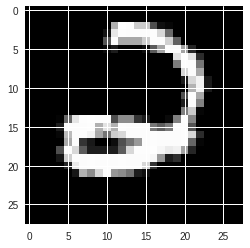

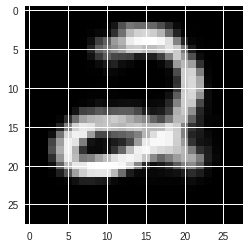

25400 28.699842 17.803305 10.896537


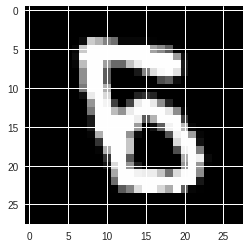

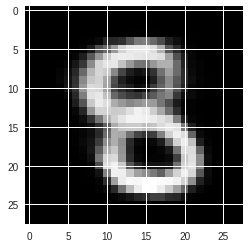

25600 25.901375 15.446504 10.454871


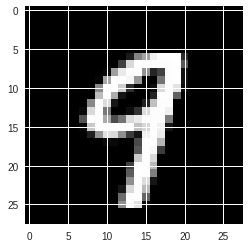

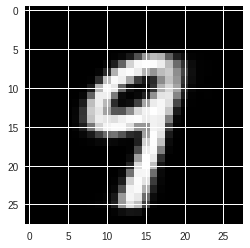

25800 29.808813 18.876516 10.932296


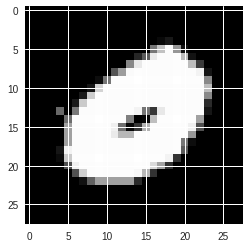

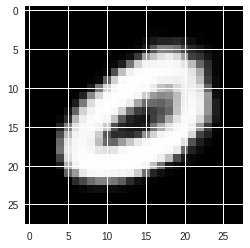

26000 27.34111 16.164843 11.176266


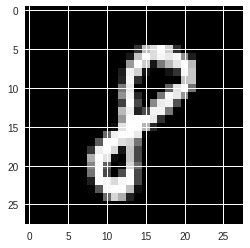

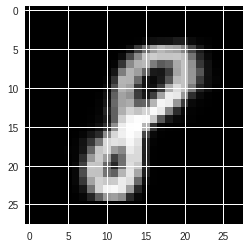

26200 27.018717 16.111437 10.90728


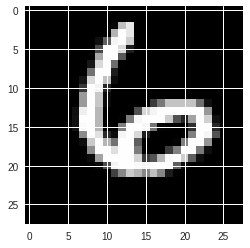

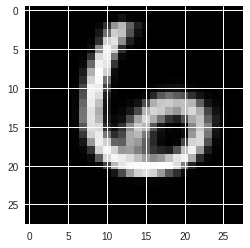

26400 26.583181 15.527644 11.055537


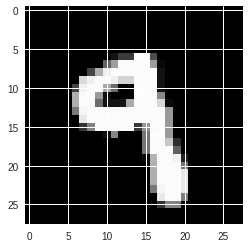

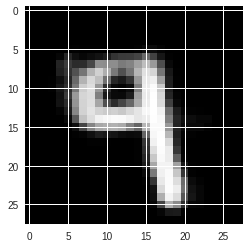

26600 26.058876 15.160194 10.898681


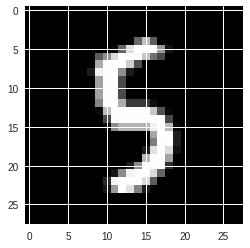

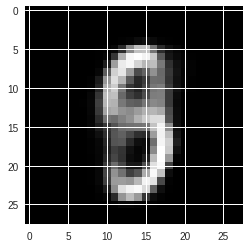

26800 30.29593 19.815102 10.48083


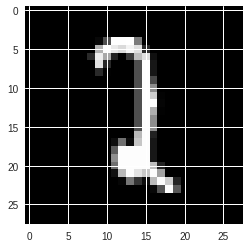

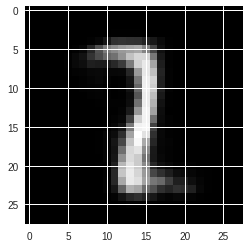

27000 28.729433 17.859571 10.869862


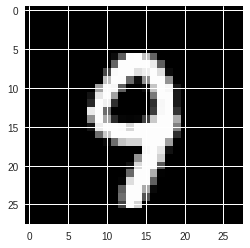

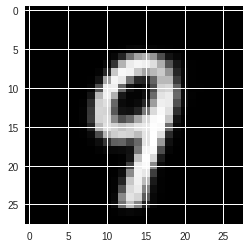

27200 25.978407 15.439852 10.538553


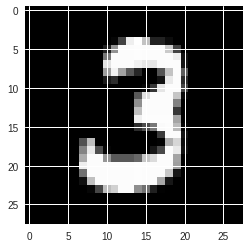

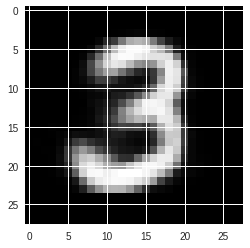

27400 28.32981 17.420885 10.908924


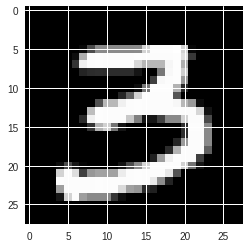

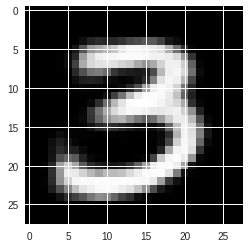

27600 28.658619 17.49662 11.162


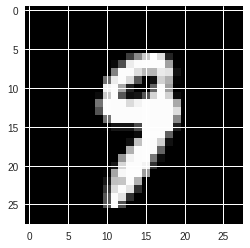

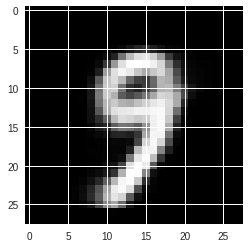

27800 26.6861 16.179115 10.506986


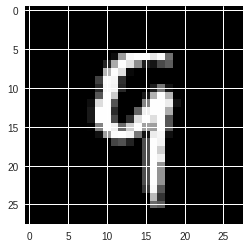

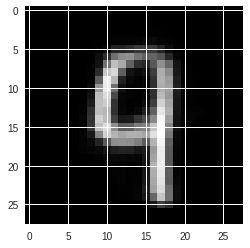

28000 27.248505 16.421371 10.827135


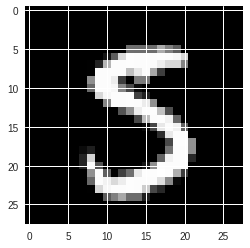

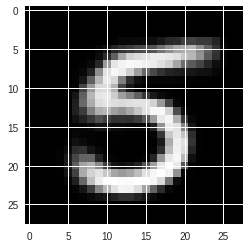

28200 27.521938 16.732527 10.78941


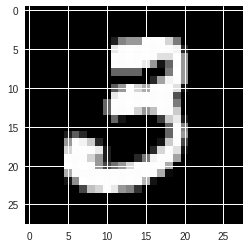

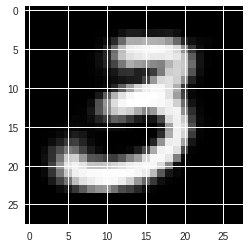

28400 26.581135 16.221716 10.35942


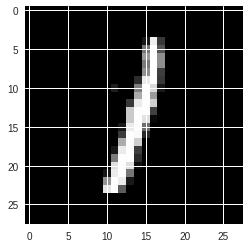

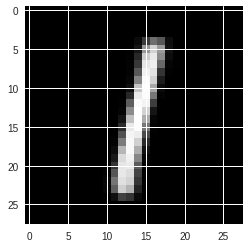

28600 26.507574 16.193583 10.313989


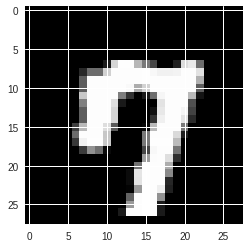

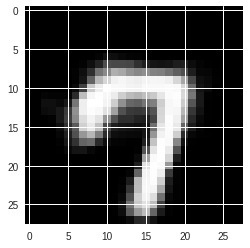

28800 28.190437 17.333475 10.856961


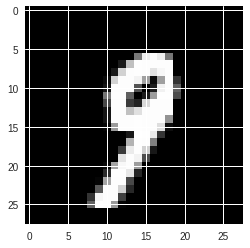

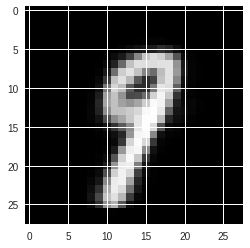

29000 27.750872 17.27932 10.471551


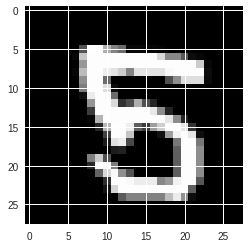

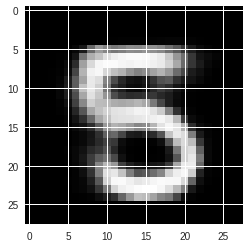

29200 27.458366 16.912573 10.545794


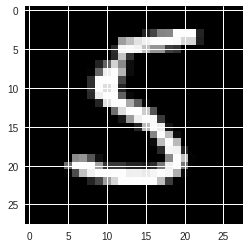

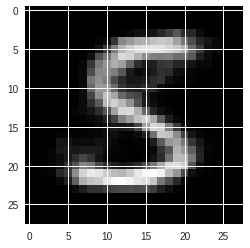

29400 27.065657 15.94075 11.124909


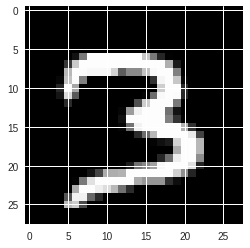

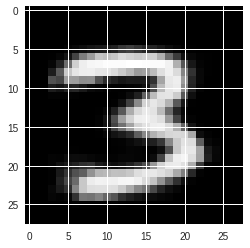

29600 27.43408 16.370836 11.063245


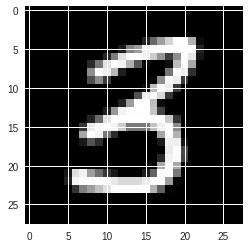

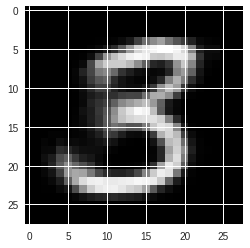

29800 31.345467 19.863474 11.481992


In [23]:
for i in range(30000):
    batch = [np.reshape(b, [28, 28]) for b in mnist.train.next_batch(batch_size=batch_size)[0]]
    sess.run(optimizer, feed_dict = {X_in: batch, Y: batch, keep_prob: 0.8})
        
    if not i % 200:
        ls, d, i_ls, d_ls, mu, sigm = sess.run([loss, dec, img_loss, latent_loss, mn, sd], feed_dict = {X_in: batch, Y: batch, keep_prob: 1.0})
        plt.imshow(np.reshape(batch[0], [28, 28]), cmap='gray')
        plt.show()
        plt.imshow(d[0], cmap='gray')
        plt.show()
        print(i, ls, np.mean(i_ls), np.mean(d_ls))

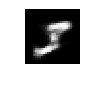

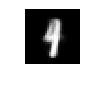

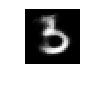

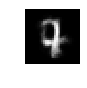

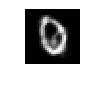

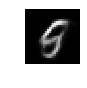

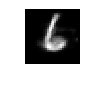

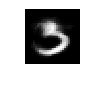

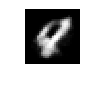

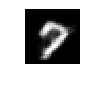

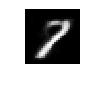

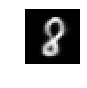

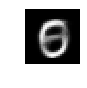

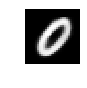

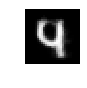

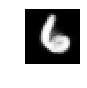

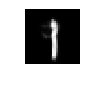

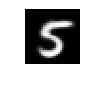

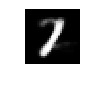

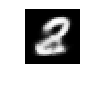

In [25]:
randoms = [np.random.normal(0, 1, n_latent) for _ in range(20)]
imgs = sess.run(dec, feed_dict = {sampled: randoms, keep_prob: 1.0})
imgs = [np.reshape(imgs[i], [28, 28]) for i in range(len(imgs))]

for img in imgs:
    plt.figure(figsize=(1,1))
    plt.axis('off')
    plt.imshow(img, cmap='gray')